In [1]:
%pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import plotly.express as px
from scipy.stats import zscore as zs
from scipy import linalg as scipy_linalg
from sklearn.model_selection import train_test_split as split
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, GRU
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error, mean_squared_log_error
from numpy.random import seed
seed(1)
import tensorflow
tensorflow.random.set_seed(1)
from keras.optimizers import SGD
from IPython.display import display, Image

2023-11-29 11:45:25.819553: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
##Matplotlib Parameters
import matplotlib.ticker as ticker
from pylab import rcParams
rcParams['axes.labelsize'] = 12
rcParams['xtick.labelsize'] = 12
rcParams['ytick.labelsize'] = 12
plt.style.context('fivethirtyeight')

# Data Description :-

In [4]:
file_path = 'https://raw.githubusercontent.com/lavibula/GoldPricePrediction/main/data/data_preparation/merged_data/data_preparation.csv'
gold_df = pd.read_csv(file_path)
gold_df.head(2)

Date  GOLD_open  GOLD_high  GOLD_low  GOLD_close  copper  crude_oil   
0  2023-11-24     1991.2     2004.5    1990.9      2003.0  3.7965      75.54  \
1  2023-11-22     1999.1     1999.4    1991.0      1991.4  3.7665      77.10   

      DXY  EURUSD    MSCI    NASDAQ    NLR  platinum    rice      RUT  silver   
0  103.40  1.0906  528.35  14250.85  75.21     931.1  1756.5  1807.50  24.329  \
1  103.92  1.0918  523.97  14265.86  74.94     924.6  1730.0  1795.54  23.672   

     SP500    VIX  FED  
0  4559.34  12.46  5.5  
1  4556.62  12.85  5.5

In [5]:
gold_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3447 entries, 0 to 3446
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        3447 non-null   object 
 1   GOLD_open   3447 non-null   float64
 2   GOLD_high   3447 non-null   float64
 3   GOLD_low    3447 non-null   float64
 4   GOLD_close  3447 non-null   float64
 5   copper      3447 non-null   float64
 6   crude_oil   3447 non-null   float64
 7   DXY         3447 non-null   float64
 8   EURUSD      3447 non-null   float64
 9   MSCI        3447 non-null   float64
 10  NASDAQ      3447 non-null   float64
 11  NLR         3447 non-null   float64
 12  platinum    3447 non-null   float64
 13  rice        3447 non-null   float64
 14  RUT         3447 non-null   float64
 15  silver      3447 non-null   float64
 16  SP500       3447 non-null   float64
 17  VIX         3447 non-null   float64
 18  FED         3447 non-null   float64
dtypes: float64(18), object(1)
m

In [6]:
gold_df.describe().drop(['25%', '50%', '75%']).transpose()

count         mean          std        min         max
GOLD_open   3447.0  1487.454714   266.665959  1053.7000   2053.6000
GOLD_high   3447.0  1494.809951   268.289656  1062.0000   2072.0000
GOLD_low    3447.0  1479.660865   265.049415  1046.2000   2040.0000
GOLD_close  3447.0  1487.344328   266.686281  1050.8000   2051.5000
copper      3447.0     3.249953     0.670830     1.9395      4.9290
crude_oil   3447.0    71.595176    22.300616   -37.6300    123.7000
DXY         3447.0    91.465550     9.049624    72.9300    114.1100
EURUSD      3447.0     1.195492     0.112456     0.9596      1.4844
MSCI        3447.0   190.566693   186.920093    25.5900    675.1500
NASDAQ      3447.0  6969.650522  3906.387230  2093.8800  16057.4400
NLR         3447.0    51.861758     7.422958    34.0800     82.3500
platinum    3447.0  1166.459617   308.674702   595.9000   1905.7000
rice        3447.0  1337.187845   234.904950   912.5000   2206.5000
RUT         3447.0  1353.723943   446.170139   590.0300   2442.7400
silver      3447.0    21.636379     6.302872    11.7350     48.5840
SP500       3447.0  2544.657987  1051.653365  1027.3700   4796.5600
VIX         3447.0    18.634610     7.220988     9.1500     82.6900
FED         3447.0     1.063896     1.371000     0.2500      5.5000

In [7]:
##Checking Missing Values
gold_df.isnull().sum()

Date          0
GOLD_open     0
GOLD_high     0
GOLD_low      0
GOLD_close    0
copper        0
crude_oil     0
DXY           0
EURUSD        0
MSCI          0
NASDAQ        0
NLR           0
platinum      0
rice          0
RUT           0
silver        0
SP500         0
VIX           0
FED           0
dtype: int64

In [8]:
##Converting Date column as DateTime format
gold_df['Date'] = pd.to_datetime(gold_df['Date'],format='%Y-%m-%d')

In [9]:
gold_df.dtypes

Date          datetime64[ns]
GOLD_open            float64
GOLD_high            float64
GOLD_low             float64
GOLD_close           float64
copper               float64
crude_oil            float64
DXY                  float64
EURUSD               float64
MSCI                 float64
NASDAQ               float64
NLR                  float64
platinum             float64
rice                 float64
RUT                  float64
silver               float64
SP500                float64
VIX                  float64
FED                  float64
dtype: object

In [10]:
##Setting Date as Index
gold_df.set_index('Date',inplace=True)

In [11]:
gold_df.head(2)

GOLD_open  GOLD_high  GOLD_low  GOLD_close  copper  crude_oil   
Date                                                                        
2023-11-24     1991.2     2004.5    1990.9      2003.0  3.7965      75.54  \
2023-11-22     1999.1     1999.4    1991.0      1991.4  3.7665      77.10   

               DXY  EURUSD    MSCI    NASDAQ    NLR  platinum    rice   
Date                                                                    
2023-11-24  103.40  1.0906  528.35  14250.85  75.21     931.1  1756.5  \
2023-11-22  103.92  1.0918  523.97  14265.86  74.94     924.6  1730.0   

                RUT  silver    SP500    VIX  FED  
Date                                              
2023-11-24  1807.50  24.329  4559.34  12.46  5.5  
2023-11-22  1795.54  23.672  4556.62  12.85  5.5

# Exploratory Data Analysis(EDA)

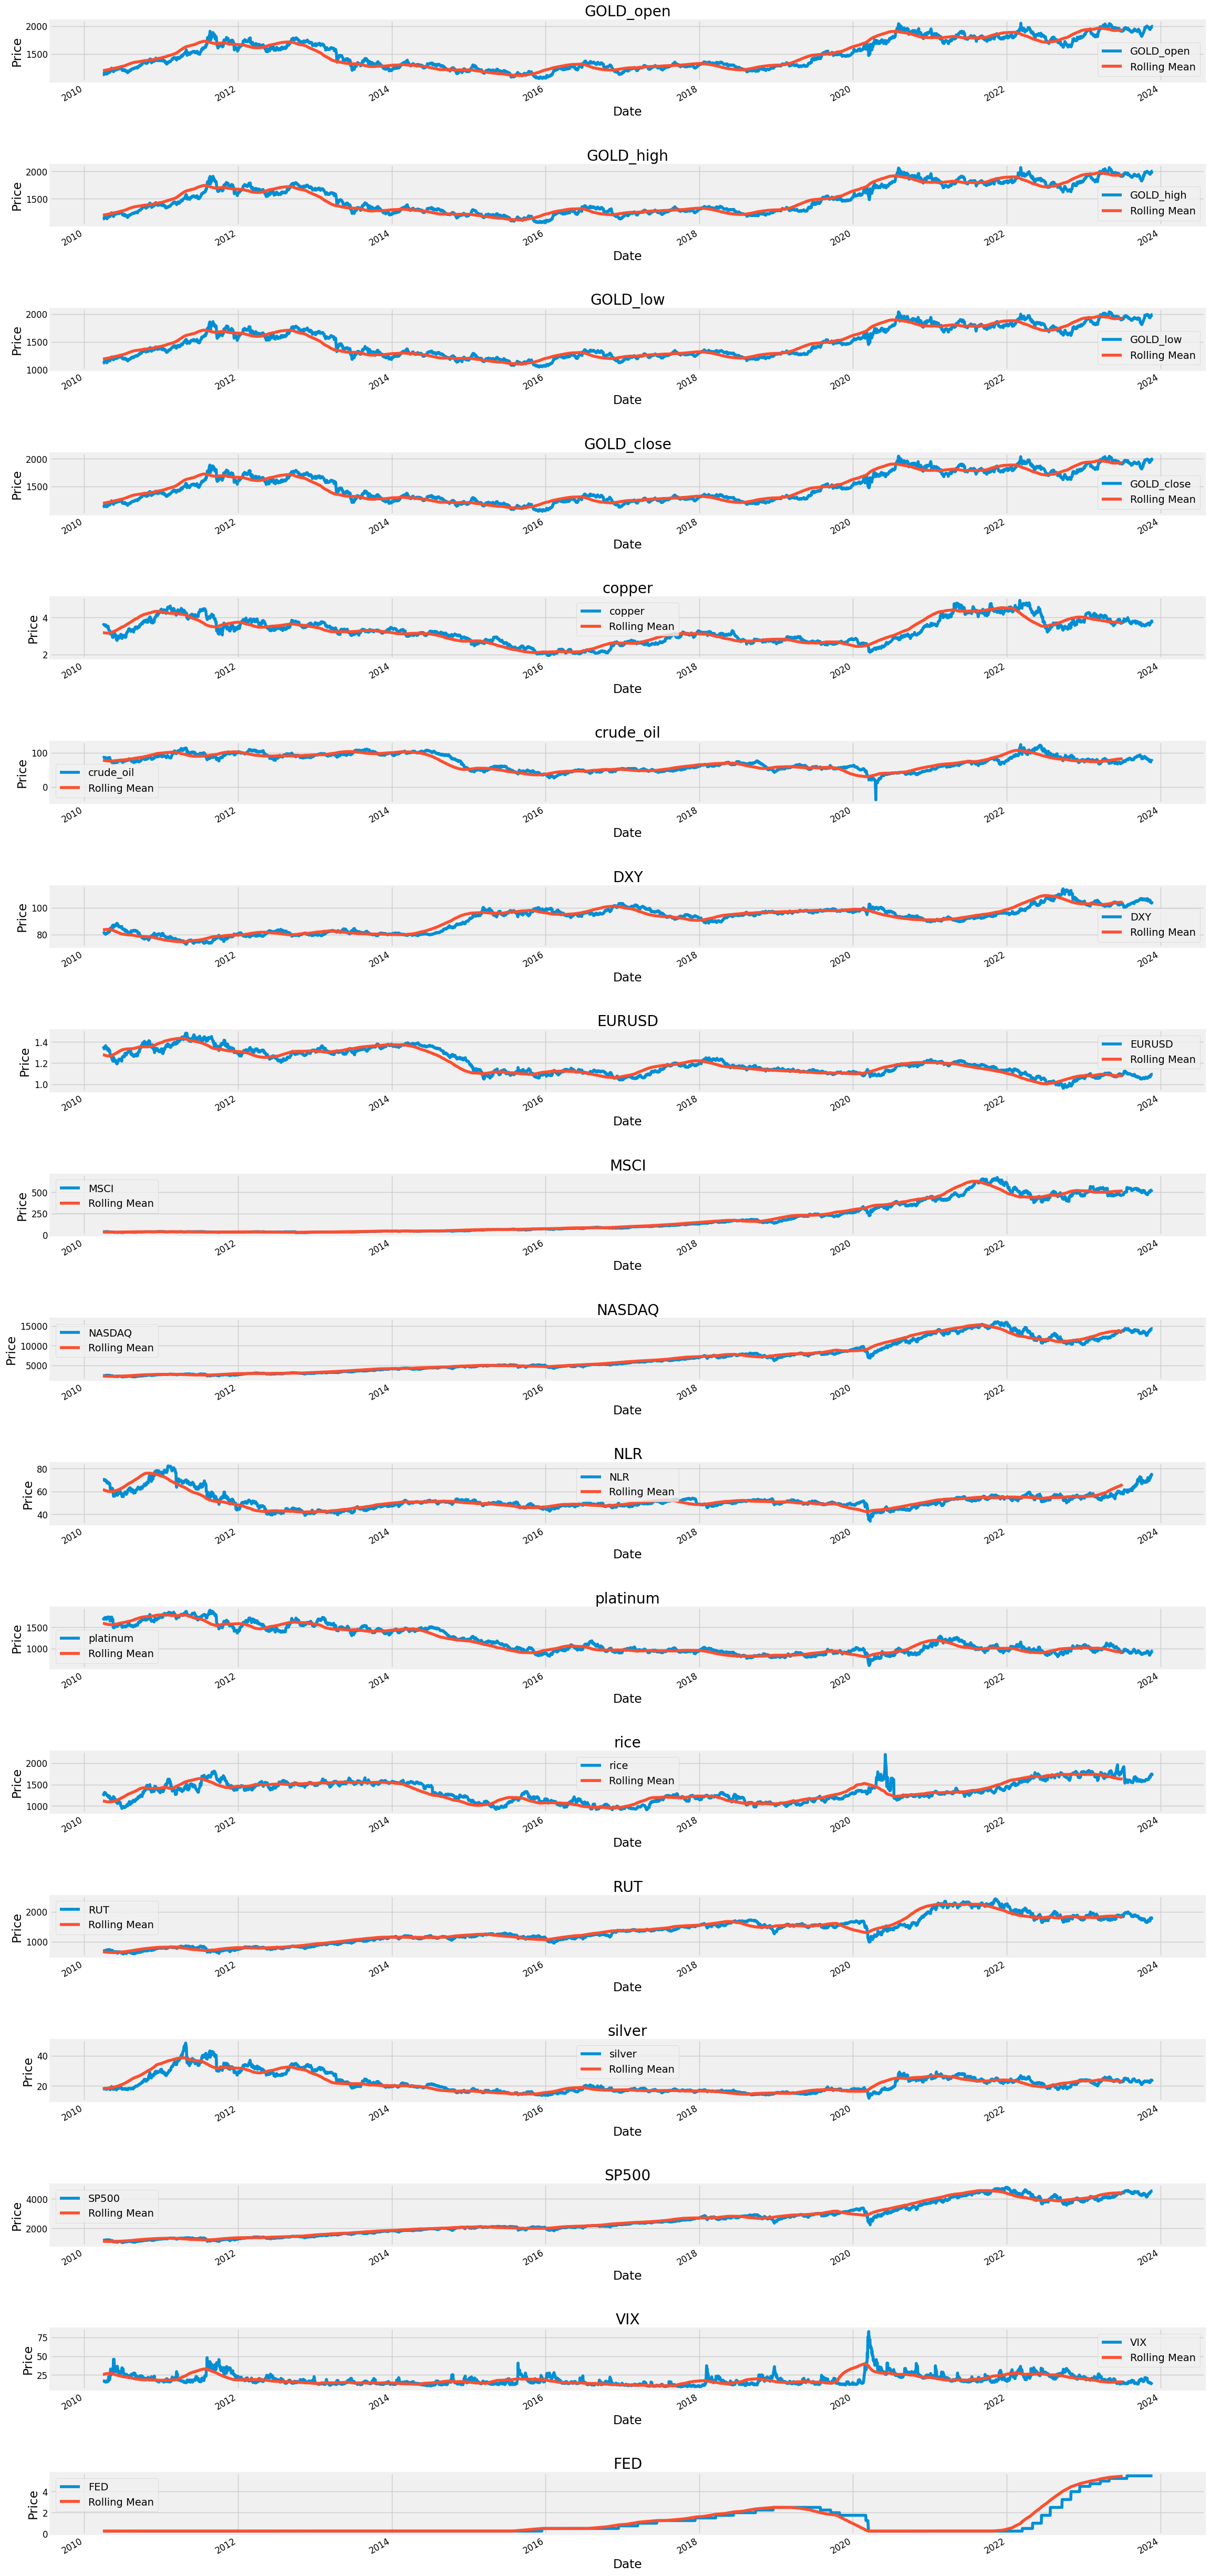

In [12]:
##Line Plots Target & Features
data = gold_df
col_names = data.columns

fig = plt.figure(figsize=(24, 50))
plt.style.use('fivethirtyeight')
for i in range(18):
  ax = fig.add_subplot(18,1,i+1)
  ax.plot(data.iloc[:,i],label=col_names[i])
  data.iloc[:,i].rolling(100).mean().plot(label='Rolling Mean')
  ax.set_title(col_names[i])
  ax.set_xlabel('Date')
  ax.set_ylabel('Price')
  plt.legend()
fig.tight_layout(pad=3.0)
plt.show()
     


/var/folders/k9/xss4jl9s24sg7_7zhcmrp2g00000gn/T/ipykernel_41937/1250311666.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.iloc[:,i],label=col_names[i],color='dodgerblue').set_title("Distribution Plot of {}".format(col_names[i]),axes=ax)
/var/folders/k9/xss4jl9s24sg7_7zhcmrp2g00000gn/T/ipykernel_41937/1250311666.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
h

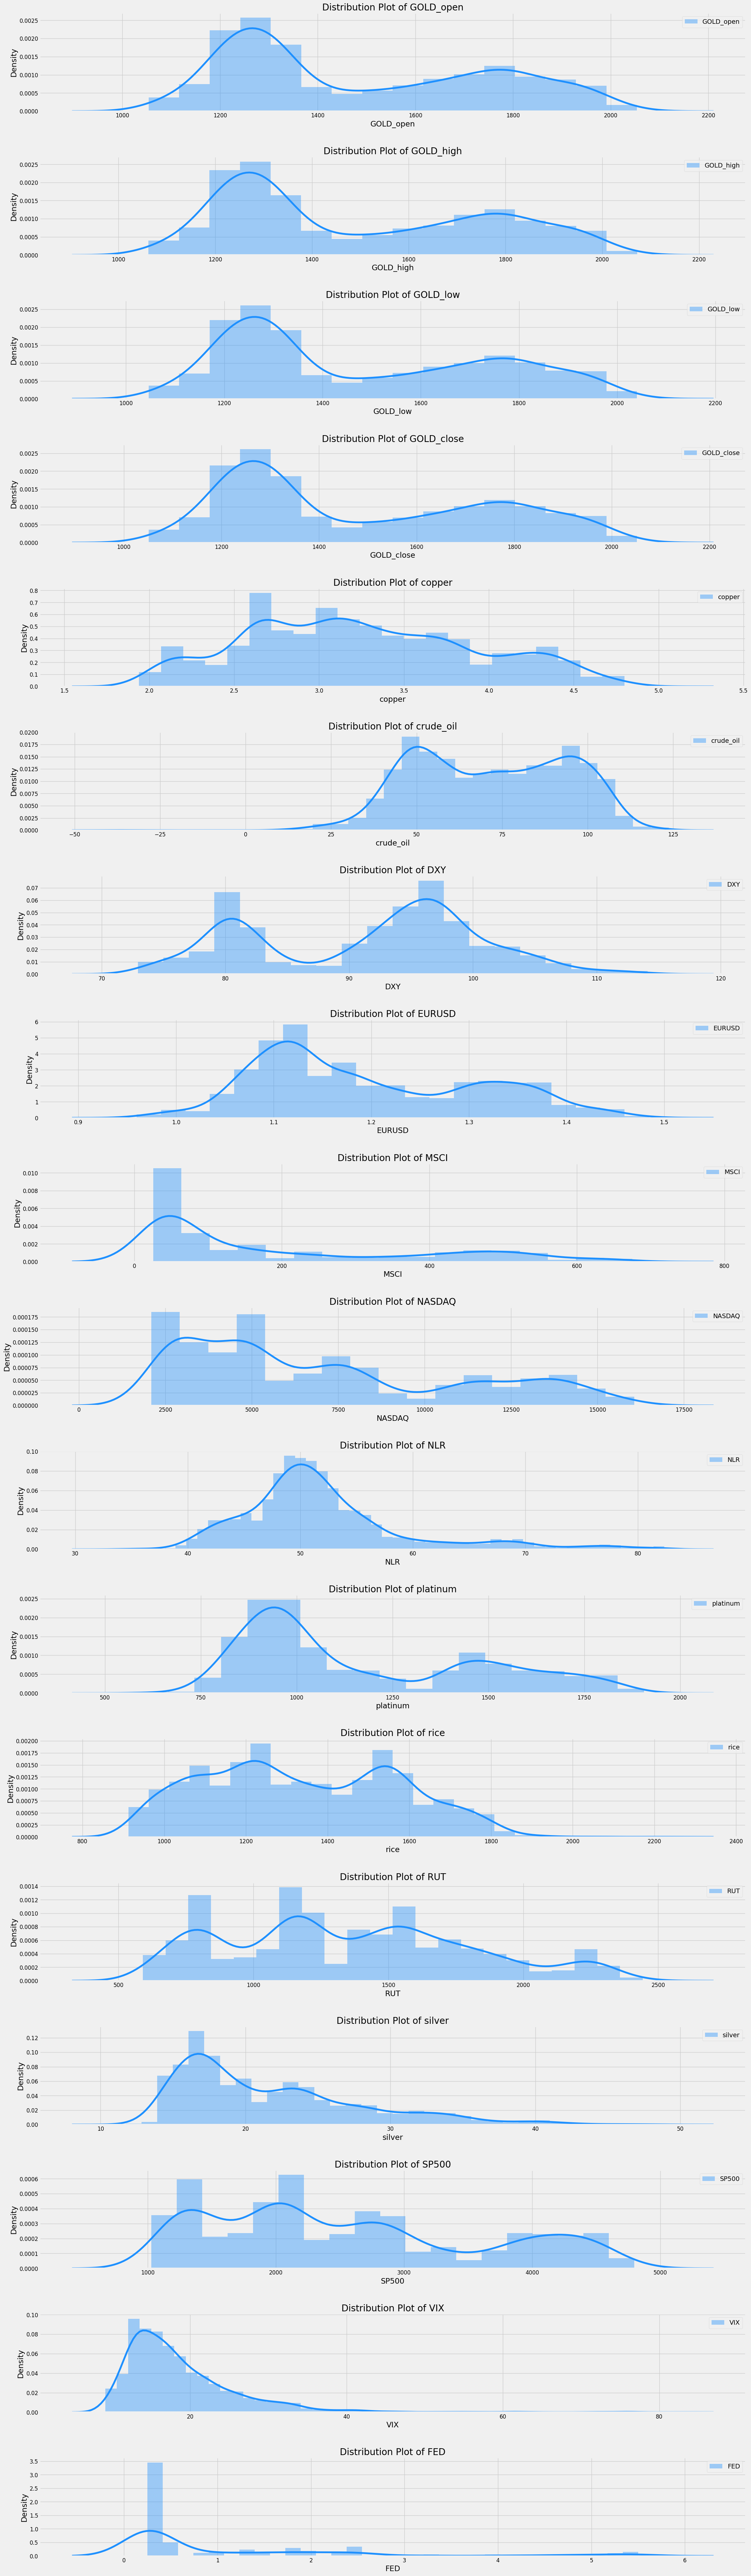

In [13]:
##Checking if Target and Features follow Normal Distribution
data = gold_df
fig = plt.figure(figsize=(24, 80))
plt.style.use('fivethirtyeight')
col_names = data.columns
for i in range(18):
  ax = fig.add_subplot(18,1,i+1)
  sns.distplot(data.iloc[:,i],label=col_names[i],color='dodgerblue').set_title("Distribution Plot of {}".format(col_names[i]),axes=ax)
  ax.tick_params(labelsize=12)
  plt.legend()
fig.tight_layout(pad=3.0)
plt.show()

From above Distribution plots :-

-> Most frequent values of GOLD are in the range of 1200 to 1400.

-> The GOLD price values above 2000 are less frequent.

-> All Features & GOLD don't follow Normal Distribution.

In [14]:
## Temporary DataFrame
temp_data = gold_df
temp_data['Year'] = gold_df.index.year

Text(0.5, 1.0, 'Box Plot Year Wise-GOLD')

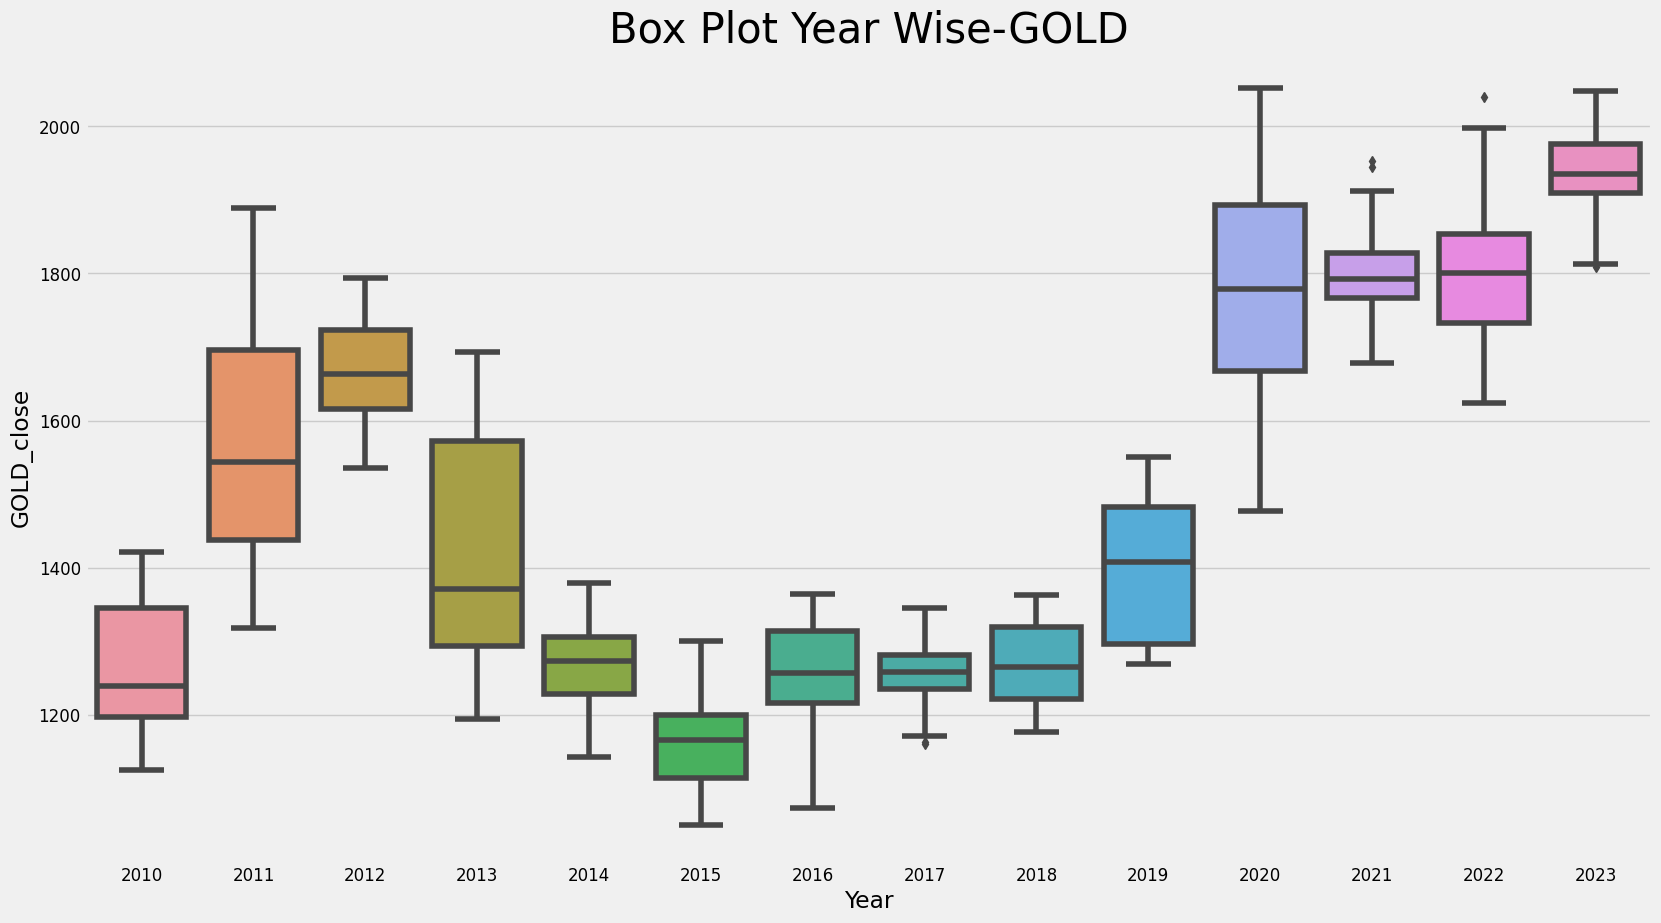

In [15]:
##Box Plot Year Wise WTI
plt.figure(figsize=(18,10))
ax = sns.boxplot(x=temp_data['Year'], y=temp_data['GOLD_close'])
ax.set_title('Box Plot Year Wise-GOLD',fontsize=30)

-> Years 2017, 2021 and 2022 show some outliers.

/var/folders/k9/xss4jl9s24sg7_7zhcmrp2g00000gn/T/ipykernel_41937/2812950034.py:17: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(240 + i)


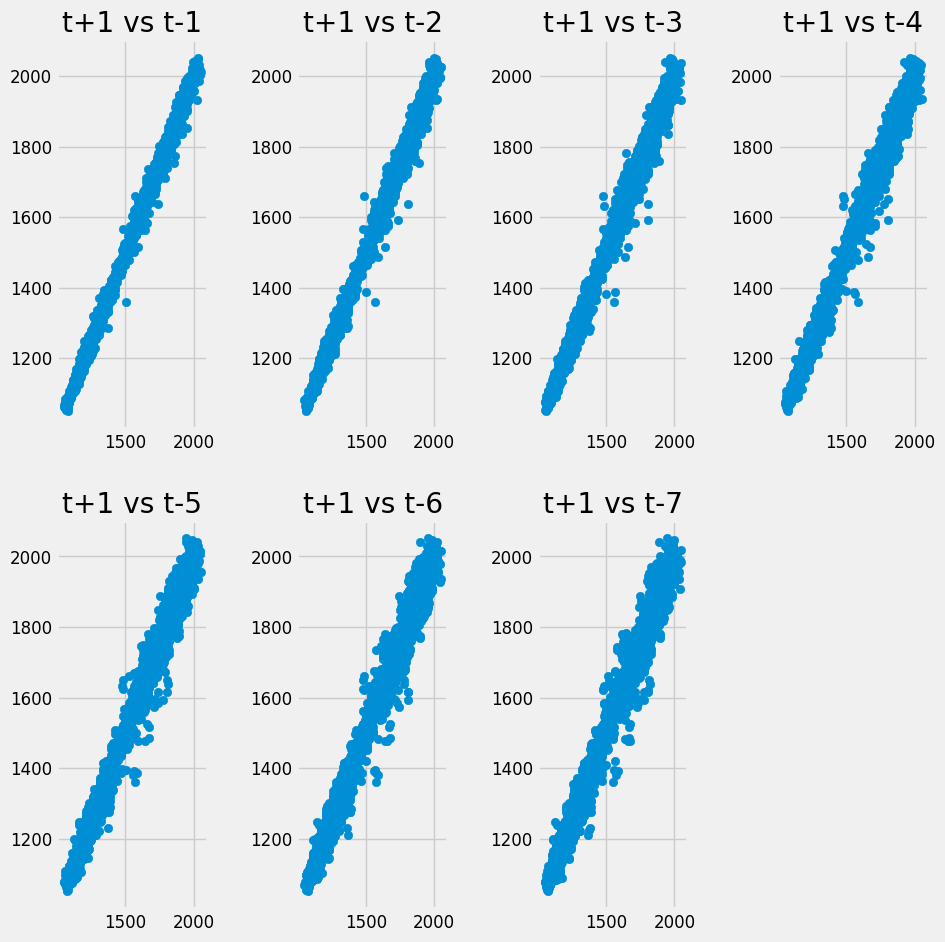

In [16]:
##Checking Series Lag Relationship(Auto-Correlation Nature)
plt.figure(figsize=(10,10))
pd.plotting.lag_plot(gold_df['GOLD_close'])
wti_series = gold_df['GOLD_close']
n_lags = 7
cols = [wti_series]

for i in range(1,(n_lags + 1)):
	cols.append(wti_series.shift(i))
df = pd.concat(cols, axis=1)
cols = ['t+1']
for i in range(1,(n_lags + 1)):
	cols.append('t-' + str(i))
df.columns = cols
plt.figure(1)
for i in range(1,(n_lags + 1)):
	ax = plt.subplot(240 + i)
	ax.set_title('t+1 vs t-' + str(i))
	plt.scatter(x=df['t+1'].values, y=df['t-'+str(i)].values)
plt.tight_layout(pad=2)
plt.show()

-> The above Lag plot indicates that GOLD has good positive correlation with each of its lagging orders.

-> This kind of series is good for time series as its showing auto-regressive nature.

## Bivariate Analysis (GOLD and Features)

In [17]:
gold_df.drop(labels=['Year'],axis=1,inplace=True)

In [18]:
##Scaling Data to Observe Bivariate Analysis 
sc = MinMaxScaler(feature_range=(0,1))
gold_df_scaled= sc.fit_transform(gold_df)

Since distribution is not normal we use Standardisation instead of Normalization.

In [19]:
##Scaled Data Glimse
gold_df_scaled[:2]

array([[0.93759376, 0.93316832, 0.95059368, 0.95153393, 0.62117411,
        0.70148144, 0.73992229, 0.2496189 , 0.77400086, 0.8706211 ,
        0.85208204, 0.25591693, 0.65224111, 0.65712929, 0.34177318,
        0.9370634 , 0.04500952, 1.        ],
       [0.94549455, 0.92811881, 0.9506943 , 0.93994204, 0.61113899,
        0.71115106, 0.75254978, 0.25190549, 0.76725784, 0.87169604,
        0.8464885 , 0.25095434, 0.63176198, 0.65067388, 0.32394366,
        0.93634176, 0.05031275, 1.        ]])

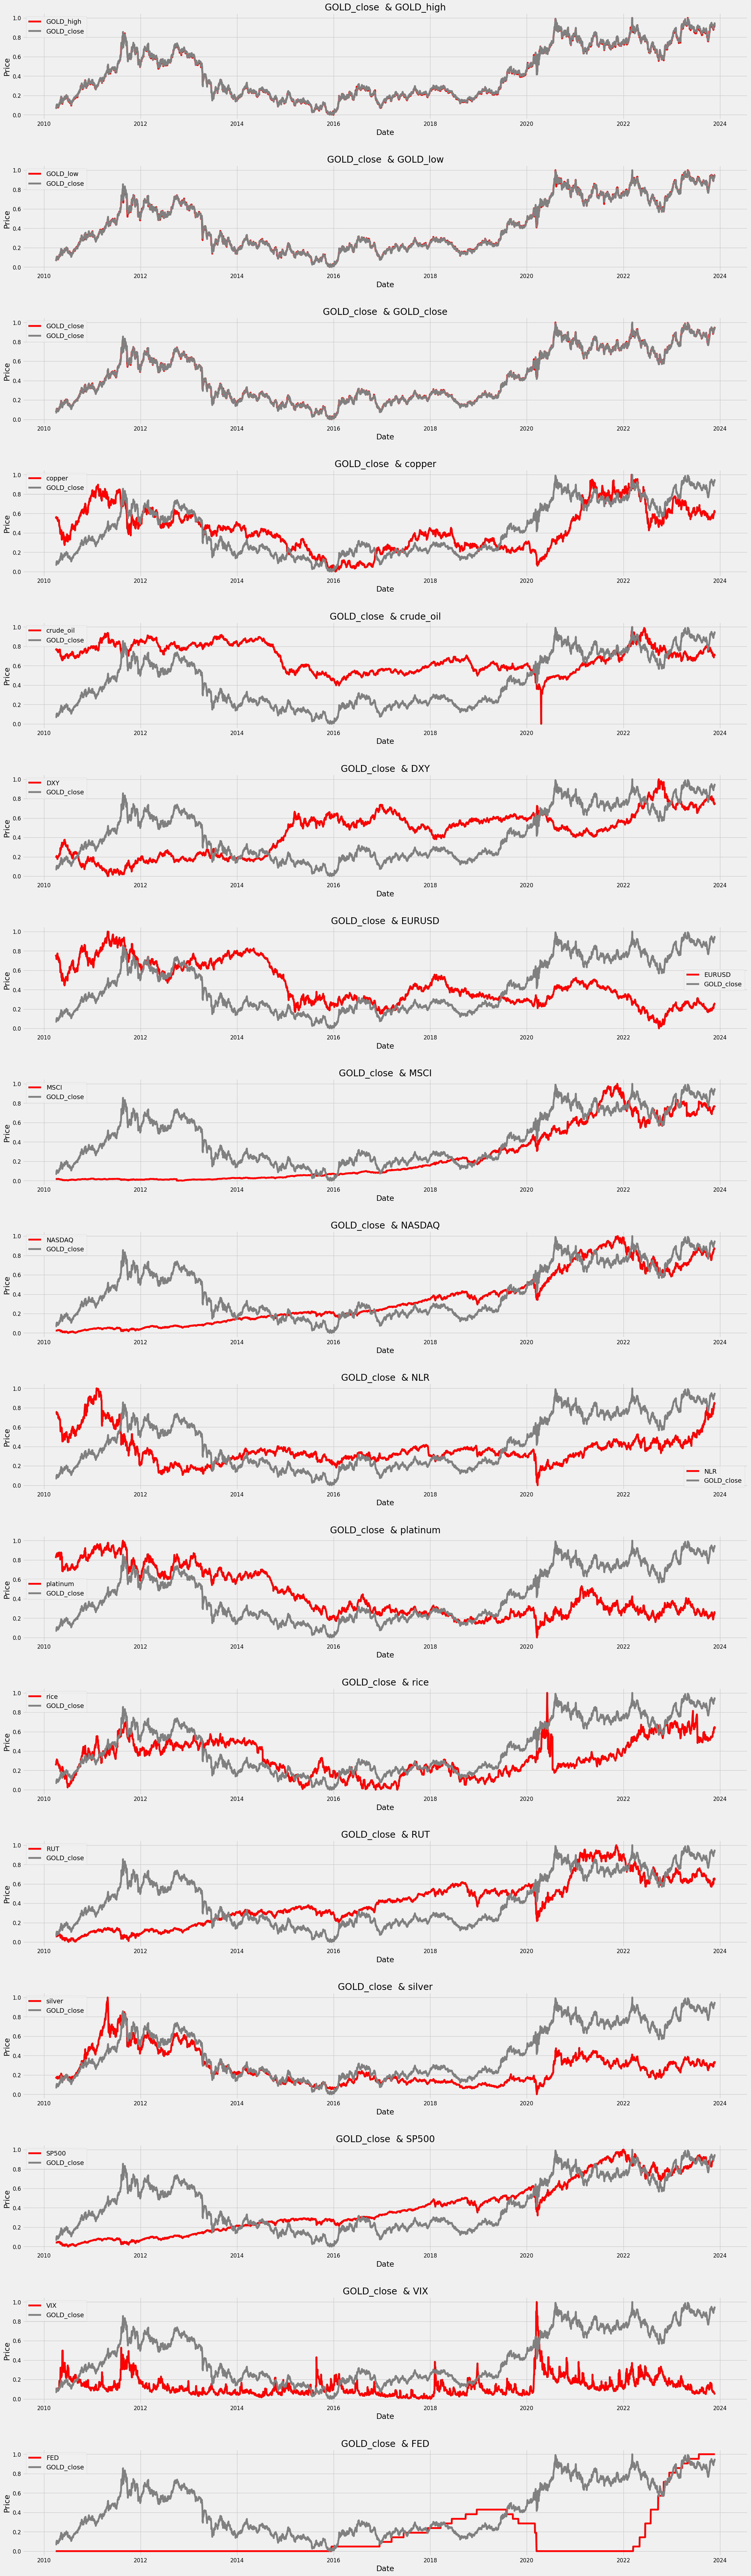

In [23]:
##Comparing Movement of WTI wrt to Features
col_names = data.columns[1:]
scaled_features = gold_df_scaled[:,1:]
fig = plt.figure(figsize=(24, 80))
plt.style.use('fivethirtyeight')
for i in range(17):
  ax = fig.add_subplot(17,1,i+1)
  ax.plot(gold_df.index,scaled_features[:,i],label=col_names[i],c='red')
  ax.plot(gold_df.index,gold_df_scaled[:,0],label='GOLD_close',c='grey')
  ax.set_title('GOLD_close  & ' + col_names[i])
  ax.set_xlabel('Date')
  ax.set_ylabel('Price')
  plt.legend()
fig.tight_layout(pad=3.0)
plt.show()

Inferences From Bivariate Feature Analysis :-
....

## Multivariate Analysis

In [25]:
import plotly.express as px


gold_df_reset = gold_df.reset_index(drop=True)

fig = px.parallel_coordinates(
    gold_df_reset,
    color='GOLD_close',
    color_continuous_scale=px.colors.diverging.Tealrose,
    title='Parallel Co-ordinates Plot'
)

fig.show()


In [ ]:
##To display on Github Viewer
display(Image(filename='data/EDA/parallel_plots_img.png'))

- Inferences From Parallel Co-ordinates Plot :-
...
- Since Target & Feature don't follow normal distribution , we will use Spearman Correlation.

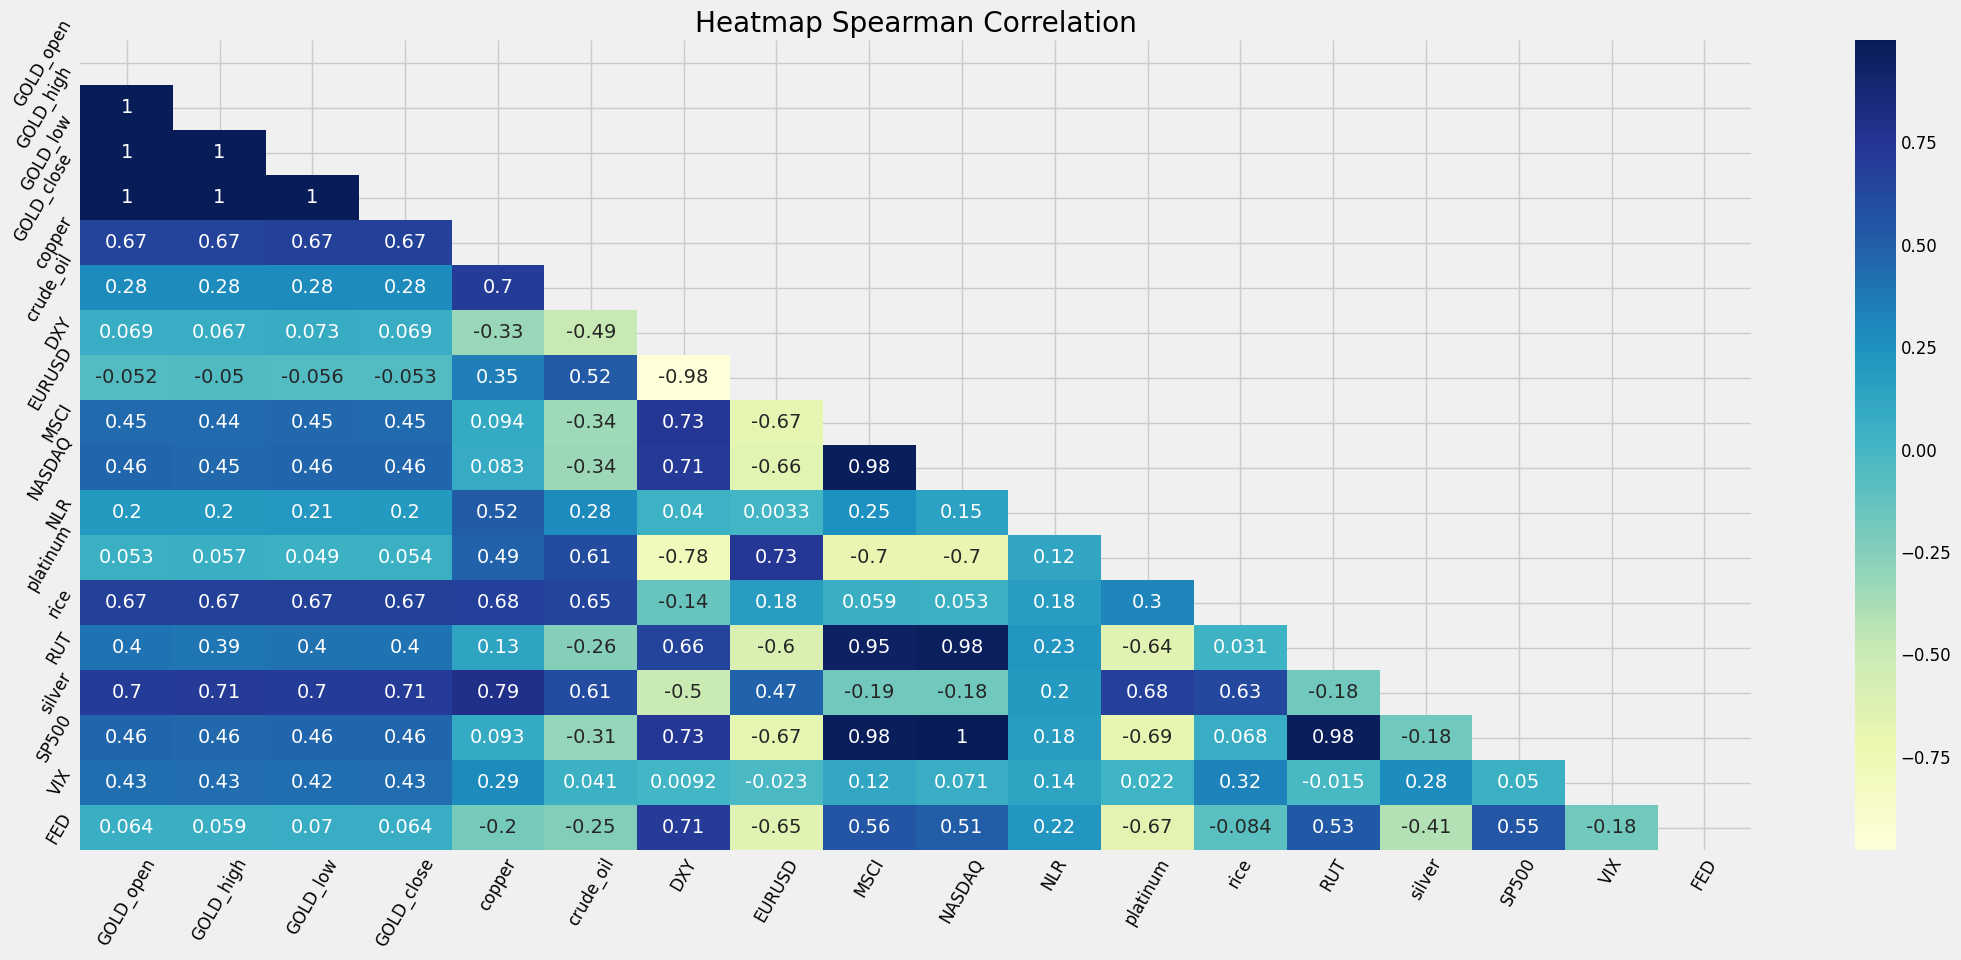

In [28]:
##HeatMap Spearman Correlation
plt.figure(figsize=(24,10))
matrix = np.triu(gold_df.corr(method='spearman'))
heat_map = sns.heatmap(gold_df.corr(method='spearman'),annot=True,annot_kws={"size":14},cmap= 'YlGnBu',mask=matrix)
heat_map.set_yticklabels(heat_map.get_yticklabels(), rotation=60)
heat_map.set_xticklabels(heat_map.get_xticklabels(), rotation=60)
plt.tick_params(labelsize=12)
plt.title('Heatmap Spearman Correlation')
plt.style.use('fivethirtyeight')

- > The highest positive correlation with target variable GOLD_close is with silver (ρ:0.7) 
- > We also observe that FED and GOLD_close have less correlation.(ρ : 0.073)
- > EURUSD and GOLD_close are moderately inversely correlated.(ρ : -0.056)
- > MSCI, NASDAQ, RUT, SP500, VIX & GOLD_close positive moderate correlation.(ρ : 0.4 - 0.5 )







## Feature Selection
We eliminate features by Filteration technique and use correlation factor . 
- >We eliminate all features having spearman correlation less than magnitude of 0.4.


In [29]:
##Feature Selection
after_fs = gold_df[['GOLD_close','GOLD_high', 'GOLD_low', 'GOLD_open', 'copper', 'MSCI', 'NASDAQ', 'rice', 'silver', 'SP500', 'VIX']]
after_fs.head(3)

GOLD_close  GOLD_high  GOLD_low  GOLD_open  copper    MSCI   
Date                                                                     
2023-11-24      2003.0     2004.5    1990.9     1991.2  3.7965  528.35  \
2023-11-22      1991.4     1999.4    1991.0     1999.1  3.7665  523.97   
2023-11-21      1999.3     2005.5    1988.5     1990.7  3.8145  524.89   

              NASDAQ    rice  silver    SP500    VIX  
Date                                                  
2023-11-24  14250.85  1756.5  24.329  4559.34  12.46  
2023-11-22  14265.86  1730.0  23.672  4556.62  12.85  
2023-11-21  14199.98  1750.0  23.843  4538.19  13.35